In [1]:
#!pip install tweepy
#!pip install selenium

### Extract reviews of any product from ecommerce website like snapdeal and amazon___
Perform sentimental analysis___

In [2]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Amol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
oneplus_reviews=[]

In [5]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [6]:

oneplus_reviews = list(set(oneplus_reviews))

In [28]:
oneplus_reviews


['\nThe  OP7T came intact and well packaged with seal in place. AMAZON could have done a better job on delivery, I had to wait 6 whole days for it to arrive....Anyways the phone is great, really a league above after the 3T. So have been using 7T since the past 4 days, and here goes my 2 cents on the phone.The first thing that I just fell in love with is that gorgeous screen. Was little worried about the notch but it doesn\'t bother me one bit. The screen is big and watching any content is a real treat. Didn\'t really notice at first any difference between the 90hz and a normal display, but it grows on you. You notice the smothness of the 90 hz during scrolling and gaming only though, and yes its hard to go back to a 60 Hz display.I do not know why all complain about the battery life. Now I am no power user, infact my usage is very basic or normal (i don\'t game much on phone), so battery performance has been veey good. I have used the display at 90 Hz all the time and have gotten in ex

In [29]:
txt_upd = ' '.join(oneplus_reviews)
txt_upd

'\nThe  OP7T came intact and well packaged with seal in place. AMAZON could have done a better job on delivery, I had to wait 6 whole days for it to arrive....Anyways the phone is great, really a league above after the 3T. So have been using 7T since the past 4 days, and here goes my 2 cents on the phone.The first thing that I just fell in love with is that gorgeous screen. Was little worried about the notch but it doesn\'t bother me one bit. The screen is big and watching any content is a real treat. Didn\'t really notice at first any difference between the 90hz and a normal display, but it grows on you. You notice the smothness of the 90 hz during scrolling and gaming only though, and yes its hard to go back to a 60 Hz display.I do not know why all complain about the battery life. Now I am no power user, infact my usage is very basic or normal (i don\'t game much on phone), so battery performance has been veey good. I have used the display at 90 Hz all the time and have gotten in exc

In [8]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [9]:
text_tokens = word_tokenize(txt_upd)

In [10]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [11]:

tf = TfidfVectorizer()

In [12]:
text_tf = tf.fit_transform(tokens_without_sw)

In [13]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

C:\Users\Amol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
df

,aah,absence,absent,absolutely,accepting,accessed,accidental,accuracy,accurate,activate,...,worried,worry,worst,xs,year,years,yellowish,youtube,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
word_list = ' '.join(df)

In [16]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

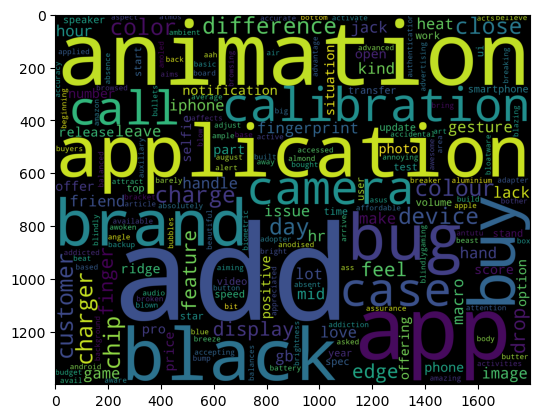

In [17]:
plt.imshow(wordcloud)

In [18]:
with open("positive-words.txt") as pw:
    positive_words = pw.read().split("\n")

In [19]:
positive_words = positive_words[35:]

In [20]:
with open("negative-words.txt", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [21]:

negative_words = negative_words[35:]

In [22]:

txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [23]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [24]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [25]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

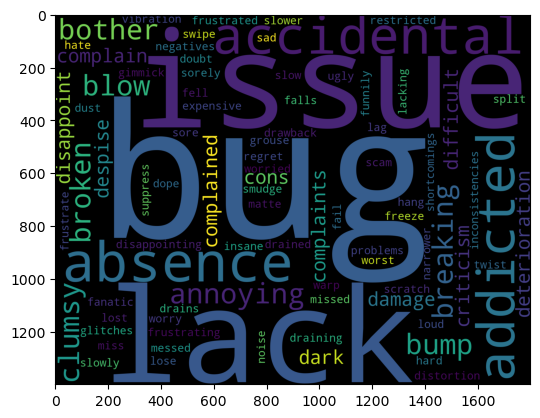

In [26]:
plt.imshow(wordcloud_neg)

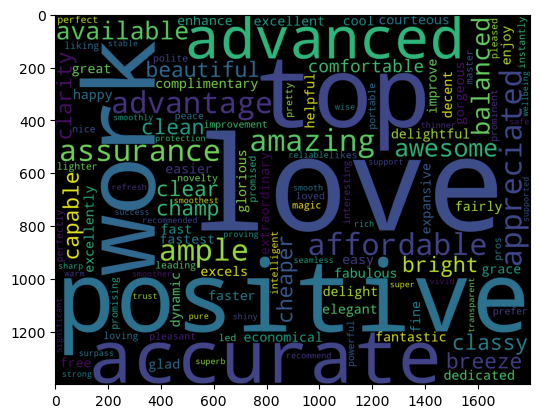

In [27]:
plt.imshow(wordcloud_pos)